In [1]:
import librosa
import numpy as np

In [2]:
time_series, sr = librosa.load('Music/JPEGMAFIA - I LAY DOWN MY LIFE FOR YOU/JPEGMAFIA - I LAY DOWN MY LIFE FOR YOU - 11 either on or off the drugs.mp3')

In [3]:
min(time_series)

np.float32(-1.2343457)

In [4]:
sr

22050

In [5]:
stft_real = np.abs(librosa.stft(time_series, hop_length=2056, n_fft=2048*2))

In [6]:
spectogram = librosa.amplitude_to_db(stft_real, ref=np.max)

In [7]:
import matplotlib

In [8]:
librosa.core.fft_frequencies(n_fft=1378*2)[55]

np.float64(440.03991291727135)

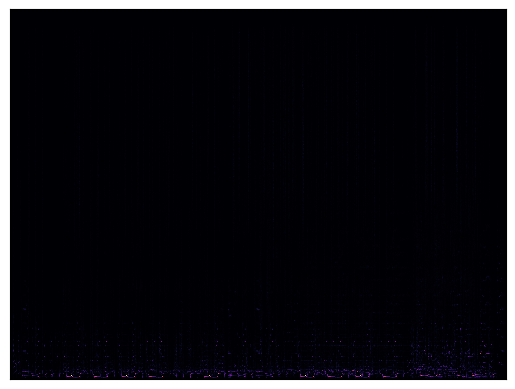

In [9]:
librosa.display.specshow(stft_real)

In [33]:
class AnnotatedAudio:

    # Initialize audio based of a time series and a sample rate.
    def __init__(self, audio_timeseries, sample_rate, samples_per_sec = 8, hops_per_second = 32):
        # Time series represents the sound wave position at a given time
        # Sample rate represents number of sounds per minute
        self.audio_timeseries = audio_timeseries
        self.sample_rate = sample_rate
        self.n_fft = int(np.round(sample_rate/samples_per_sec))
        self.hop_length =  int(np.round(sample_rate/hops_per_second))
        self._pre_process()


    # This is where the magic happens. We need to analyze the audio before it is played.
    #.
    # We can still use the raw time series for custom analysis, like dj effect detection.
    def _pre_process(self):
        # Short time forier transform
        self.stft = np.abs(librosa.stft(self.audio_timeseries, hop_length=self.hop_length, n_fft=self.n_fft))
        # Forier amplitudes to decibals
        self.spectrogram = librosa.amplitude_to_db(stft_real, ref=np.max)
        # Frequencies representing the stft and spectrogram
        self.frequencies = librosa.core.fft_frequencies(n_fft=self.n_fft)
        # Time periods representing each spectrogram / stft end time. 
        # Can be computed via n_fft/sample_rate -  ((n_fft / sr) / 2)  + [0,1,2...100] *  (aaudio.hop_length / sr) 
        self.times = librosa.core.frames_to_time(np.arange(self.spectrogram.shape[1]), sr=self.sample_rate,
                                            hop_length=self.hop_length, n_fft = self.n_fft)
        
        # TODO add beat analysis - this will allow us to check if two given "beats" are the same measure(and therefore
        # make a record spinning or vhs rewind effect.)
        dynamic_tempo = librosa.feature.tempo(y=self.audio_timeseries, 
                                                   sr=self.sample_rate,
                                                   aggregate=None,
                                                   std_bpm=1)
        
        tempo, self.beats_dynamic = librosa.beat.beat_track(y=self.audio_timeseries,
                                                       units='time',
                                                       #bpm=dynamic_tempo,
                                                       trim=False)
        

    
        

In [34]:
aaudio = AnnotatedAudio(time_series, sr)

In [35]:
from IPython.display import Audio
clicks =librosa.clicks(times=aaudio.beats_dynamic, sr=sr, click_freq=550, length=len(time_series))
Audio(data=time_series + clicks, rate=sr)

In [20]:
aaudio.beats_dynamic

array([  0.37151927,   0.74303855,   1.13777778,   1.53251701,
         1.92725624,   2.29877551,   2.67029478,   2.94893424,
         3.29723356,   4.27247166,   5.24770975,   6.22294785,
         7.15174603,   7.84834467,   8.19664399,   9.14866213,
        10.12390023,  11.09913832,  11.42421769,  11.77251701,
        12.07437642,  12.42267574,  12.7477551 ,  13.04961451,
        13.67655329,  14.32671202,  15.0000907 ,  15.67346939,
        16.32362812,  16.97378685,  17.62394558,  18.27410431,
        18.90104308,  19.5047619 ,  20.52643991,  21.43201814,
        21.80353741,  22.15183673,  22.4769161 ,  22.80199546,
        23.12707483,  23.4521542 ,  23.77723356,  24.10231293,
        24.42739229,  24.75247166,  25.07755102,  25.40263039,
        25.72770975,  26.05278912,  26.37786848,  26.70294785,
        27.02802721,  27.35310658,  27.67818594,  28.00326531,
        28.65342404,  29.28036281,  29.9537415 ,  30.60390023,
        31.11473923,  31.60235828,  31.92743764,  32.27